## Logistic Regression Challenge

In [144]:
#import the required packages here
#import the required packages here
import pandas as pd
import numpy as np

import statsmodels.api as sm

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score,f1_score

### Task 1: Download the data and load them into Python.
You can find the data [**here**](https://drive.google.com/file/d/0Bz9_0VdXvv9bX0MzUEhVdmpCc3c/view?usp=sharing&resourcekey=0-BirYbvtYO-hSEt09wpEBRw).

**Note**
- Features and response variables are in different files.
- Be careful about number of spaces between the values in the file.

In [184]:
# LOAD DATA

# get labels
activity_labels = pd.read_csv('Smartphone_Sensor_Data/activity_labels.txt', sep=" ", header=None)
features_labels = pd.read_csv('Smartphone_Sensor_Data/features.txt', sep=" ", header=None)
# print(features_labels[1].values.size)

feature_columns = features_labels[1].values
activity_columns = activity_labels[1].values # these are the labels of the y categories

# # get data and assign labels ( can't do for y yet)
X_train = pd.read_csv('Smartphone_Sensor_Data/train/X_train.txt', sep='\s+')
y_train =  pd.read_csv('Smartphone_Sensor_Data/train/y_train.txt', sep='\s+', header=None)
X_train.columns = feature_columns

# y_train.columns = activity_columns

# # tab # end of row parameter - error bad line = true - will skip
 
X_train.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.019953,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126


In [185]:
activity_label_columns = activity_labels[1].values 
activity_label_columns

array(['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING',
       'STANDING', 'LAYING'], dtype=object)

In [ ]:
# ### OKAY SO I GUESS WE TEST/TRAIN SPLIT ON THE original "TRAIN" since there's no test

In [110]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7351 entries, 0 to 7350
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


### Task 2: Create a binary target variable: categories 1,2,3 --> 1, categories 4,5,6 --> 0 
This will represent a binary variable indicating if person is walking or not.

In [64]:
y_train.head()

,0
0,5
1,5
2,5
3,5
4,5


In [76]:
y_train_binary = y_train.copy()
y_train_binary= y_train_binary.replace({2:1, 3:1, 6:0, 5:0, 4:0})

y_train_binary.columns

Int64Index([0], dtype='int64')

In [ ]:
# ##### CHECK NULL VALUES

In [136]:
# COMBINE TO STRATIFY y AND TRAIN/SPLIT
df = pd.concat([X_train, y_train_binary], axis = 1)
df = df.dropna()

random_seed = 88
df_train, df_test = train_test_split(df, test_size=0.2, random_state=random_seed, stratify=df[0])
df_train.head()
df.shape

(7351, 562)

In [121]:
# df_train['tGravityAcc-min()-Y'].isnull().values.any()
# df_train['tGravityAcc-min()-Y'].isnull().sum()
# df_train = df_train.dropna()

In [153]:
y_train_b = df_train[0].to_numpy()
X_train_b = df_train['tGravityAcc-min()-Y'].to_numpy()

y_test_b = df_test[0].to_numpy()
X_test_b = df_test['tGravityAcc-min()-Y'].to_numpy()

### Task 3

+ Create a Univariate Binary Logistic Regression with feature number 54, which represents `tGravityAcc-min()-Y`: gravity acceleration signals in direction of Y.
+ Compare the results of the Logistic regressions from different Python packages (sklearn, statsmodel).
+ Plot the **fit** of predicted probabilities to the original values.

In [154]:
X_train_b.shape

(5880,)

In [155]:
y_train_b.shape

(5880,)

In [206]:
# # sklearn
X_train_b= X_train_b.reshape(-1, 1) ## need to reshape in order to have a 2d array rather than a serries for sklearn
X_test_b = X_test_b.reshape(-1,1)

clf = LogisticRegression(penalty='none') 
clf.fit(X_train_b, y_train_b)

y_sk = clf.predict(X_test_b)

accuracy_score(y_test, y_sk)

0.7593473827328348

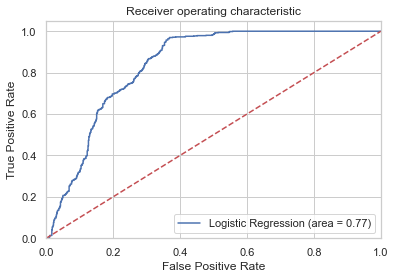

In [157]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_b, clf.predict(X_test_b))
fpr, tpr, thresholds = roc_curve(y_test_b, clf.predict_proba(X_test_b)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [213]:
# statsmodel

# import statsmodels.discrete.discrete_model as sm

import statsmodels.api as sm

logit = sm.Logit(y_train_b, X_train_b)
logit.fit()

# print(logit.summary)
y_pred_sm= logit.predict(X_test_b.T) # previous valueerror fix
sm.Logit(y_train_b,X_train_b).fit().summary()

Optimization terminated successfully.
         Current function value: 0.496443
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.496443
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 5880
Model:                          Logit   Df Residuals:                     5879
Method:                           MLE   Df Model:                            0
Date:                Tue, 12 Oct 2021   Pseudo R-squ.:                  0.2779
Time:                        22:10:12   Log-Likelihood:                -2919.1
converged:                       True   LL-Null:                       -4042.3
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -5.0826      0.144    -35.408      0.000      -5.364      -4.801
==============================================================================
"""

In [ ]:
## PROB NEED TO PROCESS THIS ONE - plot with above?

### Task 4
- Try to fit a Binary Logistic Regression with all the features? How many are significant?

In [187]:
y = df_train[0]
x = df_train.drop([0], axis=1)

# OKAY PROB SCALE FIRST... NEED TO ALSO SCALE TEST X THEN 

array([0, 1])

In [188]:
y_train_all_b = df_train[0].to_numpy()
X_train_all_b = df_train.drop([0], axis=1).to_numpy()

y_test_all_b  = df_test[0].to_numpy()
X_test_all_b  = df_train.drop([0], axis=1).to_numpy()

In [189]:
clf = LogisticRegression( max_iter= 500) 
clf.fit(X_train_all_b , y_train_all_b )

y_pred = clf.predict(X_test_all_b )

In [177]:
# print("Model weights: %s"%(clf.coef_)) # these are weights
# print("Model intercept: %s"%(clf.intercept_)) # this is the bias term
data = {'features': x.columns, 'coefficients':clf.coef_[0]}
feature_weights = pd.DataFrame(data)
feature_weights.head(2)

,features,coefficients
0,tBodyAcc-mean()-X,0.481996
1,tBodyAcc-mean()-Y,-0.024188


In [181]:
feature_weights['abs_coef'] = feature_weights['coefficients'].abs()
feature_weights.sort_values('abs_coef', ascending=False).head(20)

,features,coefficients,abs_coef
247,tBodyGyroMag-entropy(),1.698134,1.698134
119,"tBodyAccJerk-correlation()-Y,Z",-1.498814,1.498814
94,tBodyAccJerk-min()-Z,1.414978,1.414978
537,fBodyBodyGyroMag-maxInds,1.320175,1.320175
63,tGravityAcc-entropy()-Y,-1.319964,1.319964
183,tBodyGyroJerk-entropy()-Y,1.275956,1.275956
246,tBodyGyroMag-iqr(),-1.156675,1.156675
538,fBodyBodyGyroMag-meanFreq(),1.138058,1.138058
108,"tBodyAccJerk-arCoeff()-X,4",-1.093173,1.093173
432,fBodyGyro-max()-X,0.996663,0.996663


In [ ]:
# plot these to see

### Task 5
Now, let's fit Multinomial Logistic regression to predict all categories. Firstly, we can start with **Univariate** model for these features number separately:
+ 4
+ 54
- 19

Check the contingency matrix to see the effect of particular features!! (each feature can be good in predicting different categories)

In [ ]:
# RE-GET Y AND SPLIT DATA
# start fresh

In [264]:
# get labels
activity_labels = pd.read_csv('Smartphone_Sensor_Data/activity_labels.txt', sep=" ", header=None)
features_labels = pd.read_csv('Smartphone_Sensor_Data/features.txt', sep=" ", header=None)
# print(features_labels[1].values.size)

feature_columns = features_labels[1].values
activity_columns = activity_labels[1].values # these are the labels of the y categories

# # get data and assign labels ( can't do for y yet)
X_train = pd.read_csv('Smartphone_Sensor_Data/train/X_train.txt', sep='\s+')
y_train =  pd.read_csv('Smartphone_Sensor_Data/train/y_train.txt', sep='\s+', header=None)
X_train.columns = feature_columns

y_train.nunique()

0    6
dtype: int64

In [265]:
# COMBINE TO STRATIFY y AND TRAIN/SPLIT
df = pd.concat([X_train, y_train], axis = 1)
df = df.dropna()
df.iloc

# random_seed = 88
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=random_seed)#, stratify=df[0])


In [266]:
y_train = df_train.iloc[:,-1].to_numpy()
y_test = df_test.iloc[:,-1].to_numpy()
# y_test.unique()

In [267]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [250]:
xtr_4.shape

(5880,)

In [251]:
y_train.shape

(5880,)

In [263]:
xtr_4.shape

(1471, 1)

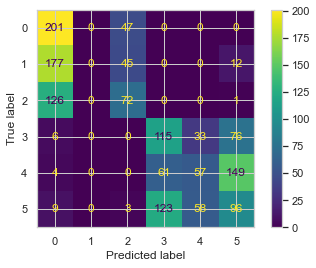

In [276]:
from sklearn import metrics

# variable 4
xtr_4 = df_train.iloc[:,4].to_numpy()
xts_4 = df_test.iloc[:,4].to_numpy()

xtr_4 = xtr_4.reshape(-1, 1)
xts_4 = xts_4.reshape(-1, 1)
# y_train.reshape(-1, 1)

clf_4 = LogisticRegression(max_iter= 500) 
clf_4.fit(xtr_4 , y_train)

y_pred = clf_4.predict(xts_4)

confusion = metrics.confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
# cm = confusion_matrix(y_test, y_pred, labels=clf_4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm) #,display_labels=clf.classes_)
disp.plot()

plt.show()
# cm

In [287]:
y_test.shape
y_pred.shape
# xts_54.shape

(5880,)

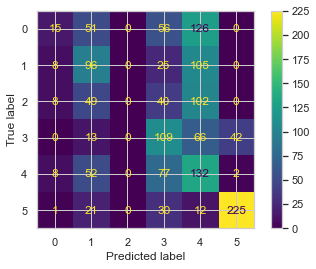

In [288]:
# variable 54
xtr_54 = df_train.iloc[:,54].to_numpy()
xts_54 = df_test.iloc[:,54].to_numpy()

xtr_54 = xtr_54.reshape(-1, 1)
xts_54 = xts_54.reshape(-1, 1)
# y_train.reshape(-1, 1)

clf_54 = LogisticRegression(max_iter= 500) 
clf_54.fit(xtr_54 , y_train)

y_pred = clf_54.predict(xts_54)

confusion = metrics.confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm) #,display_labels=clf.classes_)
disp.plot()

plt.show()

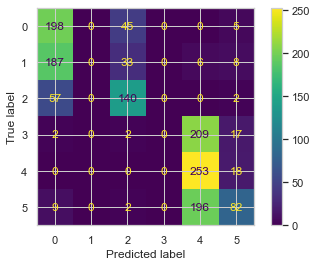

In [290]:
# var 19
xtr_19 = df_train.iloc[:,19].to_numpy()
xts_19 = df_test.iloc[:,19].to_numpy()

xtr_19 = xtr_19.reshape(-1, 1)
xts_19 = xts_19.reshape(-1, 1)
# y_train.reshape(-1, 1)

clf_19 = LogisticRegression(max_iter= 500) 
clf_19.fit(xtr_19 , y_train)

y_pred = clf_19.predict(xts_19)

confusion = metrics.confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm) #,display_labels=clf.classes_)
disp.plot()

plt.show()

### Task 6

Fit the Multinomial Logistic Regression model again. Now, try to choose **all** the important features we have in the dataset. Compare with your peers on who will get the best predictions with the smallest number of features?

In [412]:
# get labels
activity_labels = pd.read_csv('Smartphone_Sensor_Data/activity_labels.txt', sep=" ", header=None)
features_labels = pd.read_csv('Smartphone_Sensor_Data/features.txt', sep=" ", header=None)
# print(features_labels[1].values.size)

feature_columns = features_labels[1].values
activity_columns = activity_labels[1].values # these are the labels of the y categories

# # get data and assign labels ( can't do for y yet)
X_train = pd.read_csv('Smartphone_Sensor_Data/train/X_train.txt', sep='\s+')
y_train =  pd.read_csv('Smartphone_Sensor_Data/train/y_train.txt', sep='\s+')
X_train.columns = feature_columns
y_train.columns = ['y_true']

# COMBINE TO STRATIFY y AND TRAIN/SPLIT
df = pd.concat([X_train, y_train], axis = 1)
df = df.dropna()
# print(df.shape)

# random_seed = 88
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)
X_train, X_test = train_test_split(df, test_size=0.2, random_state=random_seed)#, stratify=df[0])
print(df_train.shape, df_test.shape)

y_train = X_train.iloc[:,-1].to_numpy()

y_test = X_test.iloc[:,-1].to_numpy()

X_train = X_train.drop('y_true')
X_test = X_test.iloc[:,:-1].to_numpy()

# REMOVE Y!!!

(5880, 562) (1471, 562)


KeyError: "['y_true'] not found in axis"

In [411]:
X_test.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [327]:
print(y_test.shape, X_test.shape, X_train.shape, y_train.shape)
X_train.head()

(1471,) (1471, 562) (5880, 562) (5880,)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",y_true
3524,0.265302,-0.021532,-0.090546,-0.985704,-0.976354,-0.954929,-0.985036,-0.973211,-0.947121,-0.936614,...,-0.502348,-0.849743,-0.088981,-0.028060,-0.482237,-0.588619,0.394021,-0.552884,-0.423231,6
5277,0.279868,-0.028164,-0.121730,-0.991782,-0.901434,-0.967255,-0.993475,-0.923363,-0.968263,-0.921891,...,-0.145928,-0.516022,-0.065427,-0.045921,0.141562,0.296854,-0.843448,0.186640,-0.047214,5
3081,0.283710,-0.019656,-0.107424,-0.995956,-0.984864,-0.970212,-0.996483,-0.982368,-0.969375,-0.937490,...,-0.665626,-0.889483,-0.397648,0.083677,-0.148015,-0.582332,-0.819753,0.039578,0.135062,5
5741,0.107778,-0.056986,-0.058030,-0.672401,-0.840129,-0.825006,-0.708338,-0.827604,-0.830710,-0.881381,...,0.550653,0.309633,0.106068,0.056814,-0.417187,0.518254,0.621974,-0.582991,-0.420232,6
5173,0.233513,-0.009197,-0.085181,-0.557972,-0.145740,-0.393489,-0.572629,-0.136529,-0.391882,-0.473186,...,-0.178797,-0.541438,0.378804,-0.592721,-0.230210,-0.548103,-0.698380,0.159338,-0.190076,1


In [297]:
# from sklearn.model_selection import RepeatedStratifiedKFold 
# model = LogisticRegression(multi_class='multinomial')
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [328]:
# SHOULD BE DOING CROSS VALIDATION HERE
clf = LogisticRegression(max_iter= 800) 
clf.fit(X_train , y_train)

y_pred = clf.predict(X_test)

score = clf.score(X_test, y_test)
print(score)

1.0


/Users/lilakelland/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [331]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[250   0   0   0   0   0]
 [  0 236   0   0   0   0]
 [  0   0 193   0   0   0]
 [  0   0   0 224   0   0]
 [  0   0   0   0 278   0]
 [  0   0   0   0   0 290]]


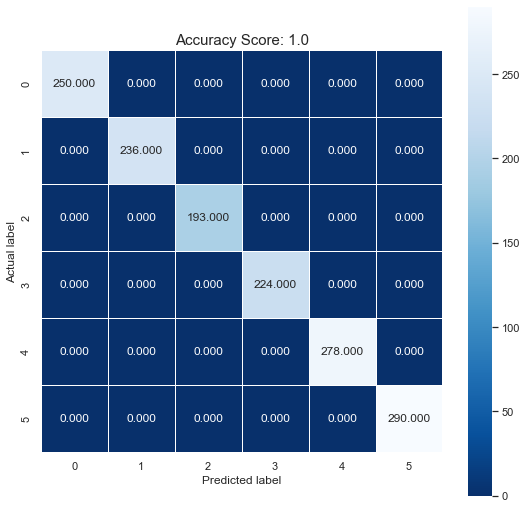

In [332]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [338]:
clf.coef_[0].shape


(1471, 562)

In [339]:
# w0 = clf.intercept_[0]
w = clf.coef_[0]

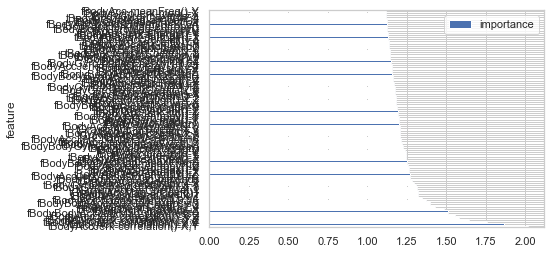

In [350]:
import math
feature_importance = pd.DataFrame(X_test.columns, columns = ["feature"])
# feature_importance = X_test.columns
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False).head(100)
 
from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

In [351]:
# feature_importance.head(50)Not a steep drop off try a different mehod?

In [356]:
# # test_prob = clf.predict_proba(X_test)[:, 1]
# test_pred = clf.predict(X_test)
# # print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
# # print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
# # print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
# print('\nUsing 0.5 as threshold:')
# print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
# print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
# print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
# print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

# print('\nClassification Report')
# print(classification_report(y_test, test_pred))

# THIS DOESN"S SEE< TO WORK WILL NEED TO ADJUST FOR MULTINOMIAL

In [ ]:
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [374]:
# # # TRY recursive feature elimination
# https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-download-auto-examples-feature-selection-plot-rfe-with-cross-validation-py
https://machinelearningmastery.com/rfe-feature-selection-in-python/ This one looks good!
# LOOK AT ABOVE ADD IN CV

from sklearn.feature_selection import RFECV

estimator = LogisticRegression(multi_class='multinomial')
selector = RFE(estimator,n_features_to_select=12, step=3)
selector = selector.fit(X_train, y_train)
#


In [390]:
rank = selector.ranking_
rank == 1
np.where(np.any(rank==1))

(array([0]),)

In [391]:
# selector.support_

# selector.ranking_


In [393]:
x = selector.ranking_
y= [i for i, e in enumerate(x) if e == 1]
y

[9, 40, 41, 52, 56, 70, 234, 268, 366, 367, 369, 561]

In [366]:
selector.n_features_

12

### Try again with new subset

In [398]:
# get labels
activity_labels = pd.read_csv('Smartphone_Sensor_Data/activity_labels.txt', sep=" ", header=None)
features_labels = pd.read_csv('Smartphone_Sensor_Data/features.txt', sep=" ", header=None)
# print(features_labels[1].values.size)

feature_columns = features_labels[1].values
activity_columns = activity_labels[1].values # these are the labels of the y categories

# # get data and assign labels ( can't do for y yet)
X_train = pd.read_csv('Smartphone_Sensor_Data/train/X_train.txt', sep='\s+')
y_train =  pd.read_csv('Smartphone_Sensor_Data/train/y_train.txt', sep='\s+')
X_train.columns = feature_columns
y_train.columns = ['y_true']

# COMBINE TO STRATIFY y AND TRAIN/SPLIT
df = pd.concat([X_train, y_train], axis = 1)
df = df.dropna()
# print(df.shape)
df = df.iloc[y]

# random_seed = 88
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)
X_train, X_test = train_test_split(df, test_size=0.2, random_state=random_seed)#, stratify=df[0])
print(df_train.shape, df_test.shape)

y_train = X_train.iloc[:,-1].to_numpy()

y_test = X_test.iloc[:,-1].to_numpy()

(5880, 562) (1471, 562)


In [401]:
y

[9, 40, 41, 52, 56, 70, 234, 268, 366, 367, 369, 561]

In [407]:
# GRAB THESE CREATE DF, SPLIT ETC>>>
col = list(df.columns)
col_list = []
for i in range(len(col)):
    if i in y:
        col_list.append(col[i])
        
col_list

df = df[col_list]

# OHNO Y_TRUE WAS STILL IN THERE ABOVE _ THATS WHY 1?

In [409]:
col_list

['tBodyAcc-max()-X',
 'tGravityAcc-mean()-X',
 'tGravityAcc-mean()-Y',
 'tGravityAcc-min()-X',
 'tGravityAcc-energy()-X',
 'tGravityAcc-arCoeff()-Y,2',
 'tBodyAccJerkMag-entropy()',
 'fBodyAcc-std()-X',
 'fBodyAccJerk-entropy()-X',
 'fBodyAccJerk-entropy()-Y',
 'fBodyAccJerk-maxInds-X',
 'y_true']

In [ ]:
clf = LogisticRegression(max_iter= 800) 
clf.fit(X_train , y_train)

y_pred = clf.predict(X_test)

score = clf.score(X_test, y_test)
print(score)

### Task 7 (Stretch)
Create your own function for Stepwise selection. Use either sklearn or statsmodel.